## Importing Libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

## Data Preprocessing 

### Training Image Preprocessing 

In [5]:
import tensorflow as tf

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False  # Keep this if needed
)


Found 20789 files belonging to 11 classes.


### Validation set image

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5198 files belonging to 11 classes.


### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant
   feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [2]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.models import Sequential

In [8]:
model=Sequential()

#### Building Convolutional Layer

In [9]:
from tensorflow.keras.layers import Dense, Conv2D ,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
# Convolutional layer and max pooling
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.25)) # To avoid overfitting

In [16]:
# Flattening
model.add(Flatten())

In [17]:
# Hidden layer    here units=neuron (increased neurons from 1024 to 1500)
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
# Output layer
model.add(Dense(units=11,activation='softmax'))

### Compiling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
650/650 [==============================] - 841s 1s/step - loss: 0.8477 - accuracy: 0.7044 - val_loss: 0.3289 - val_accuracy: 0.8900
Epoch 2/10
650/650 [==============================] - 808s 1s/step - loss: 0.2759 - accuracy: 0.9065 - val_loss: 0.1494 - val_accuracy: 0.9517
Epoch 3/10
650/650 [==============================] - 809s 1s/step - loss: 0.1847 - accuracy: 0.9386 - val_loss: 0.1617 - val_accuracy: 0.9479
Epoch 4/10
650/650 [==============================] - 893s 1s/step - loss: 0.1299 - accuracy: 0.9552 - val_loss: 0.1120 - val_accuracy: 0.9633
Epoch 5/10
650/650 [==============================] - 896s 1s/step - loss: 0.1056 - accuracy: 0.9638 - val_loss: 0.1316 - val_accuracy: 0.9559
Epoch 6/10
650/650 [==============================] - 836s 1s/step - loss: 0.0800 - accuracy: 0.9721 - val_loss: 0.1126 - val_accuracy: 0.9646
Epoch 7/10
650/650 [==============================] - 827s 1s/step - loss: 0.0749 - accuracy: 0.9747 - val_loss: 0.0743 - val_accuracy: 0.9736

## Model Evaluation

In [23]:
# Model Evaluation on Training set
train_loss,train_acc=model.evaluate(training_set)

650/650 [==============================] - 170s 261ms/step - loss: 0.0117 - accuracy: 0.9962


In [24]:
print(train_loss,train_acc)

0.011661470867693424 0.9961518049240112


In [25]:
# Model Evaluation on Validation set
val_loss,val_acc=model.evaluate(training_set)

650/650 [==============================] - 169s 259ms/step - loss: 0.0117 - accuracy: 0.9962


In [26]:
print(val_loss,val_acc)

0.011661482974886894 0.9961518049240112


### Saving Model

In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'loss': [0.8477441072463989,
  0.2759482264518738,
  0.1846783459186554,
  0.1299314945936203,
  0.10559327900409698,
  0.08002766966819763,
  0.07490062713623047,
  0.0632394403219223,
  0.05688267946243286,
  0.05118846520781517],
 'accuracy': [0.7043628692626953,
  0.9064890146255493,
  0.9386214017868042,
  0.955168604850769,
  0.9638270139694214,
  0.9721487164497375,
  0.9746981859207153,
  0.9788830876350403,
  0.9815768003463745,
  0.9821059107780457],
 'val_loss': [0.328884094953537,
  0.14943933486938477,
  0.1617170125246048,
  0.11199227720499039,
  0.13157515227794647,
  0.11259007453918457,
  0.07430322468280792,
  0.10044386237859726,
  0.06211882457137108,
  0.05459185689687729],
 'val_accuracy': [0.8899576663970947,
  0.9517121911048889,
  0.9478645920753479,
  0.9632551074028015,
  0.9559445977210999,
  0.9646017551422119,
  0.9736437201499939,
  0.9667179584503174,
  0.9786456227302551,
  0.9813389778137207]}

In [29]:
# Recording HIstory in JSON
import json
with open ("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:

print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Accuracy Visualization 

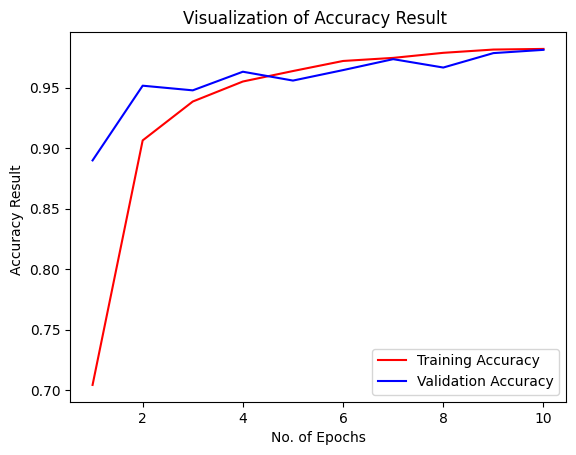

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result ")
plt.title("Visualization of Accuracy Result ")
plt.legend()
plt.show()

### Some other metric for model evalutaion

In [32]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [33]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5198 files belonging to 11 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

163/163 [==============================] - 42s 256ms/step


(array([[9.98964667e-01, 9.68937229e-07, 9.43701206e-09, ...,
         1.17302011e-06, 4.68416239e-08, 1.05372550e-07],
        [9.99814451e-01, 3.70534764e-07, 1.69494783e-08, ...,
         7.88452496e-07, 1.01986154e-06, 1.23925417e-07],
        [1.00000000e+00, 1.21298388e-10, 1.46977170e-11, ...,
         2.09175057e-14, 1.24275054e-15, 8.33039887e-11],
        ...,
        [2.54033893e-07, 1.10919025e-08, 4.64812935e-08, ...,
         1.67815373e-09, 2.84983639e-06, 9.99996662e-01],
        [1.51604311e-08, 2.71997735e-09, 8.47403303e-09, ...,
         2.93262109e-10, 1.33085734e-06, 9.99998689e-01],
        [2.49510799e-06, 4.25270446e-06, 4.16442672e-05, ...,
         1.55352865e-07, 7.82536347e-07, 9.99941587e-01]], dtype=float32),
 (5198, 11))

In [35]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(5198,), dtype=int64, numpy=array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)>

In [37]:
true_categories = tf.concat([y for c,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(5198, 11), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(5198,), dtype=int64, numpy=array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.98      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       1.00      0.98      0.99       440
                                   Apple___healthy       0.99      0.97      0.98       502
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.94      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.96      0.96       477
                            Corn_(maize)___healthy       1.00      1.00      1.00       465
                             Potato___Early_blight       0.99      0.99      0.99       485
                              Potato___Late_blight       0.99      0.99      0.

In [41]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[494,   3,   0,   4,   2,   0,   0,   0,   1,   0,   0],
       [  2, 494,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  3,   0, 431,   0,   3,   0,   0,   0,   3,   0,   0],
       [  8,   1,   0, 487,   0,   0,   0,   0,   0,   1,   5],
       [  1,   0,   0,   0, 387,   3,  19,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2, 475,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  17,   1, 458,   1,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 464,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 481,   4,   0],
       [  2,   0,   0,   0,   0,   0,   1,   0,   2, 478,   2],
       [  3,   0,   1,   0,   0,   0,   0,   0,   0,   0, 452]],
      dtype=int64)

### Confussion Matrix Visualisation

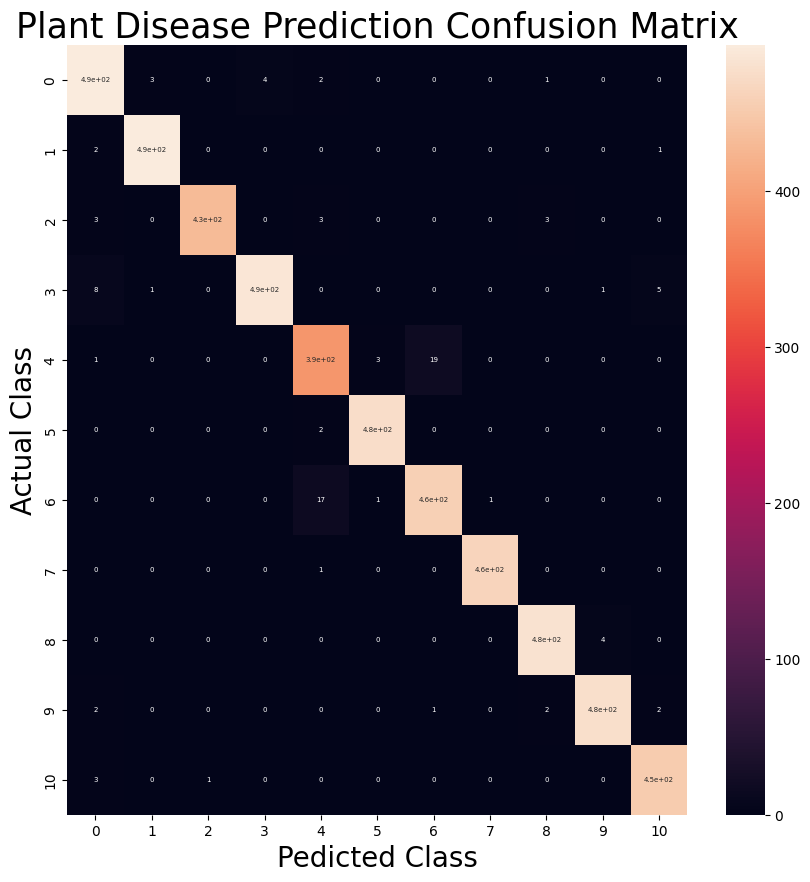

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={'size':5})
plt.xlabel("Pedicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()